In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC



In [2]:
# Load the dataset
data = pd.read_csv('Solar_radiation_classification.csv')

# Inspect the data
#print(data.head())
data.head()


,Air Temperature (C°),Air Temperature Uncertainty (C°),Wind Direction at 3m (°N),Wind Direction at 3m Uncertainty (°N),Wind Speed at 3m (m/s),Wind Speed at 3m Uncertainty (m/s),Wind Speed at 3m (std dev) (m/s),DHI (Wh/m2),DHI Uncertainty (Wh/m2),Standard Deviation DHI (Wh/m2),...,GHI Uncertainty (Wh/m2),Standard Deviation GHI (Wh/m2),Peak Wind Speed at 3m (m/s),Peak Wind Speed at 3m Uncertainty (m/s),Relative Humidity (%),Relative Humidity Uncertainty (%),Barometric Pressure (mB (hPa equiv)),Barometric Pressure Uncertainty (mB (hPa equiv)),GHI (Wh/m2),Class
0,1.598833,-0.039841,-1.358521,0.163933,-0.351941,0.677977,-0.309934,2.087472,2.420683,-6.322829e-16,...,0.645691,0.0,0.358986,0.116591,-1.346289,-0.04948,-0.350323,-0.364441,0.516210,Running
1,1.415552,-0.039841,-1.333544,0.163933,-0.460051,-1.548603,-0.731123,0.780151,1.294103,-6.322829e-16,...,0.693011,0.0,-0.401816,0.116591,-1.239218,-0.04948,-0.305136,-0.364441,0.527461,Running
2,1.034891,-0.039841,-1.241959,0.163933,-0.784380,-1.548603,-1.152311,0.093343,0.300212,-6.322829e-16,...,0.194101,0.0,-1.264058,0.116591,-1.152541,-0.04948,-0.206155,-0.364441,0.391562,Monitoring
3,0.174880,-0.039841,-1.075441,0.163933,-1.000600,-1.548603,-1.152311,-0.634539,-0.039165,-6.322829e-16,...,-0.002891,0.0,-1.137258,0.116591,-0.974088,-0.04948,-0.092112,0.054434,0.101813,Monitoring
4,-0.572343,-0.039841,-0.883946,0.163933,-0.892490,-1.548603,-0.731123,-0.993174,-0.147613,-6.322829e-16,...,-0.071556,0.0,-0.934377,0.116591,0.326067,-0.04948,-0.046925,0.054434,-0.319541,Monitoring


In [3]:
# Define feature columns and the target column
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Assuming 'Class' column has 3 unique classes
print(data['Class'].isna().sum())  # Should output 0 if cleaned properly



0


In [4]:
data['Class'].value_counts()

,count
Class,
Monitoring,576
Running,430
Inspecting,256


In [5]:
X.shape,y.shape

((1262, 22), (1262,))

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but may improve performance for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [7]:
# Initialize the Decision Tree classifier
sv_classifier = SVC(kernel="linear",  random_state=0)


# Fit the model to the training data
sv_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = sv_classifier.predict(X_test_scaled)

#vaibhav Chavan
import matplotlib.pyplot as plt
from sklearn import tree
feature_names = [f'Feature {i+1}' for i in range(22)]  # Modify with actual feature names if available
class_names = ['Monitoring', 'Running', 'Inspecting']  # Modify with actual class names




In [8]:
# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))




Classification Report:
              precision    recall  f1-score   support

  Monitoring       0.96      1.00      0.98        54
     Running       0.98      0.96      0.97       115
  Inspecting       0.96      0.98      0.97        84

    accuracy                           0.97       253
   macro avg       0.97      0.98      0.97       253
weighted avg       0.97      0.97      0.97       253



In [9]:

# Evaluate the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,precision_recall_curve
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
recall=recall_score(y_test, y_pred,average='macro')
# macro: Unweighted average of the metrics for each class.All classes are treated equally.
print(f'Recall: {recall:.4f}')
precision=precision_score(y_test, y_pred,average='macro')
print(f'Precision: {precision:.4f}')
f1=f1_score(y_test, y_pred,average='macro')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.9723
Recall: 0.9776
Precision: 0.9704
F1-Score: 0.9738


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
recall=recall_score(y_test, y_pred,average='weighted')
print(f'Recall: {recall:.4f}')
#weighted: Takes class imbalance into account by weighting each class's contribution by
#its support (number of true instances).
precision=precision_score(y_test, y_pred,average='weighted')
print(f'Precision: {precision:.4f}')
f1=f1_score(y_test, y_pred,average='weighted')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.9723
Recall: 0.9723
Precision: 0.9725
F1-Score: 0.9723


In [11]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 54   0   0]
 [  2 110   3]
 [  0   2  82]]


In [12]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Inspecting       0.96      1.00      0.98        54
  Monitoring       0.98      0.96      0.97       115
     Running       0.96      0.98      0.97        84

    accuracy                           0.97       253
   macro avg       0.97      0.98      0.97       253
weighted avg       0.97      0.97      0.97       253



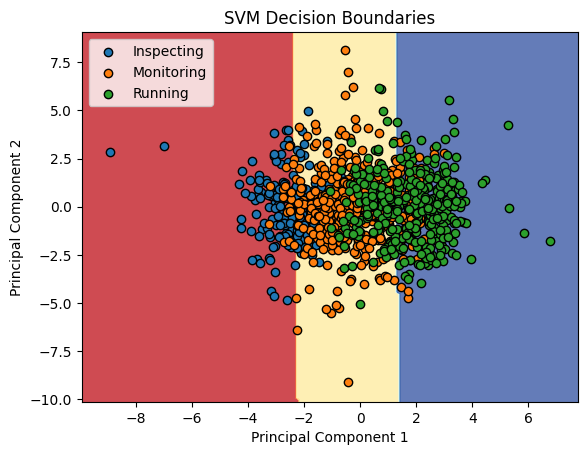

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have X_train_scaled, y_train, and sv_classifier from your previous code

# 1. Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# 2. Create a meshgrid for plotting
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 3. Predict class labels for each point in the meshgrid
Z = sv_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Convert string labels to numerical values for contour plotting
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Z_numeric = label_encoder.fit_transform(Z.ravel())  # Flatten Z and encode
Z_numeric = Z_numeric.reshape(Z.shape)             # Reshape back to original shape

# 4. Plot decision boundaries
# Use Z_numeric for contour plotting
plt.contourf(xx, yy, Z_numeric, alpha=0.8, cmap=plt.cm.RdYlBu) # Use a colormap for better visualization

# 5. Plot data points with class-specific colors
for class_label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == class_label, 0],
                X_train_pca[y_train == class_label, 1],
                label=class_label, edgecolors='k')

# 6. Customize the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundaries')
plt.legend()
plt.show()